In [71]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import datetime
import statistics

import xgboost
import catboost
import lightgbm

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from statistics import median
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

warnings.filterwarnings("ignore")
%matplotlib inline

# EDA

In [72]:
#получение данных из источника, проверка и переименование полей, исключение заведомо бесполезных для моделирования

data = pd.read_csv('/home/dataengineer/OTUS_ML/OTUS_ML_notebooks/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

data = data.drop(['Customer', 'Policy Type'], axis=1)

data.columns =['State', 'CLV', 'Response', 'Coverage', 'Education', 'Effective_to_date', 
               'Employment_status', 'Gender', 'Income', 'Location_code', 'Marital_status', 
               'Monthly_premium_auto', 'Months_since_last_claim', 'Months_since_policy_inception', 
               'Number_of_open_complaints', 'Number_of_policies', 'Policy', 'Renew_offer_type', 
               'Sales_channel', 'Total_claim_amount', 'Vehicle_class', 'Vehicle_size']

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   CLV                            9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective_to_date              9134 non-null   object 
 6   Employment_status              9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location_code                  9134 non-null   object 
 10  Marital_status                 9134 non-null   object 
 11  Monthly_premium_auto           9134 non-null   int64  
 12  Months_since_last_claim        9134 non-null   i

,State,CLV,Response,Coverage,Education,Effective_to_date,Employment_status,Gender,Income,Location_code,...,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,Policy,Renew_offer_type,Sales_channel,Total_claim_amount,Vehicle_class,Vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [73]:
#получение базовых статистик

data.describe()

,CLV,Income,Monthly_premium_auto,Months_since_last_claim,Months_since_policy_inception,Number_of_open_complaints,Number_of_policies,Total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


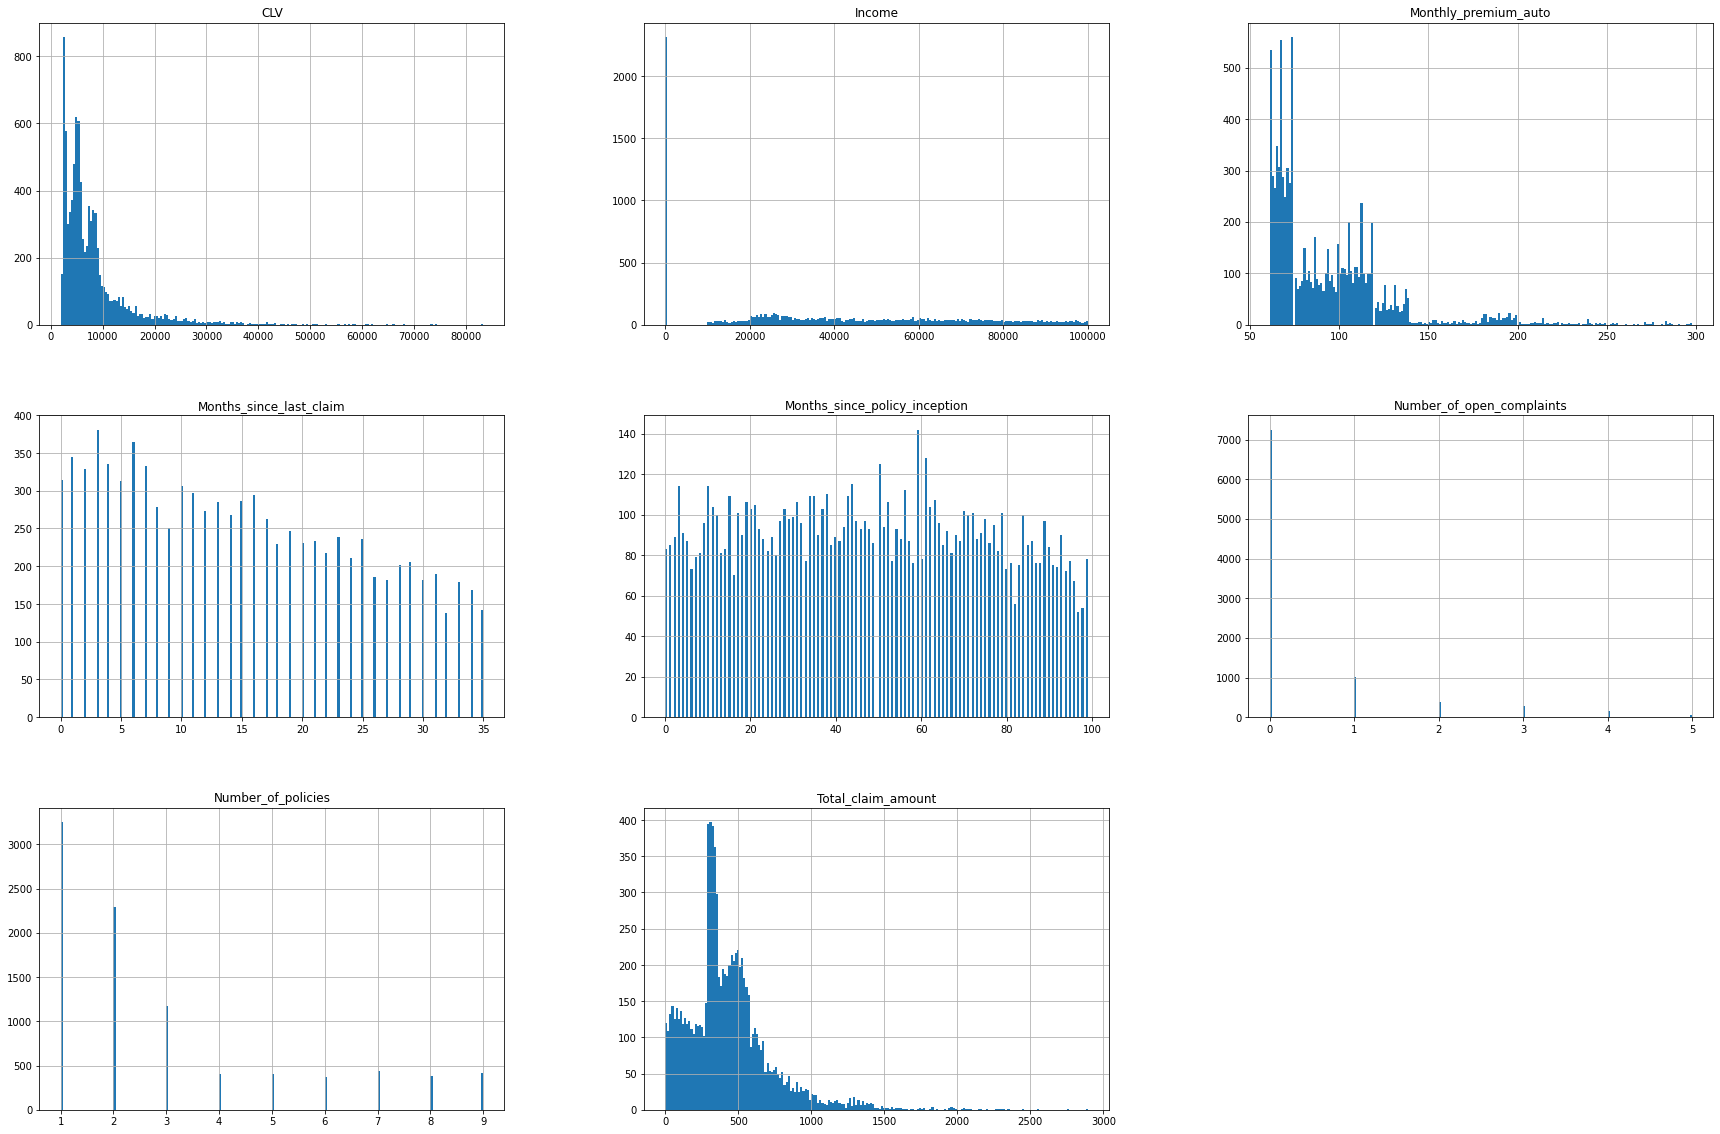

In [74]:
#построение гистограмм для оценки распределения непрерывных переменных

data.hist(figsize=(30, 20), bins=200);

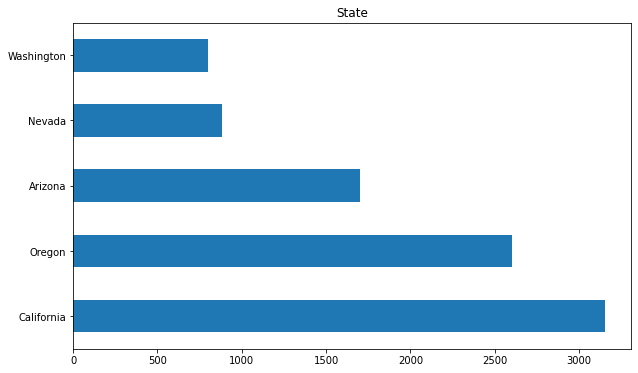

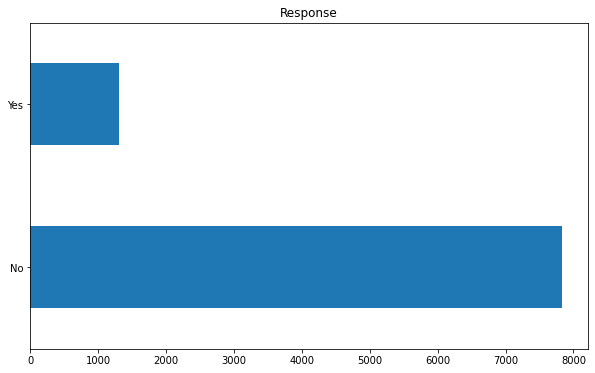

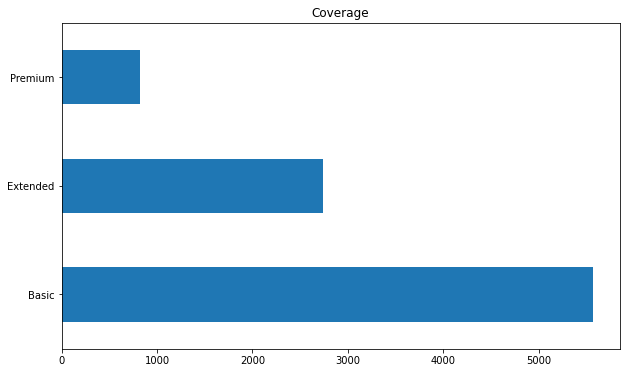

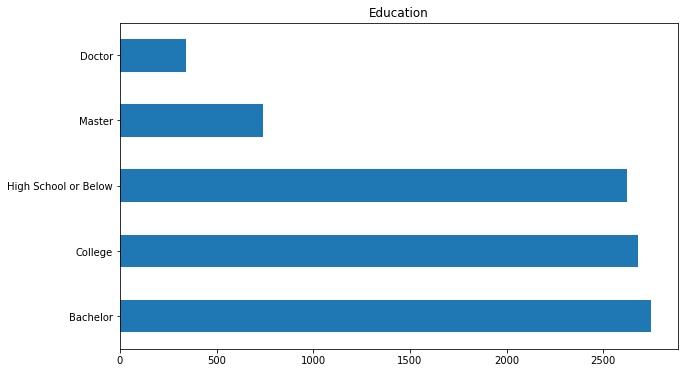

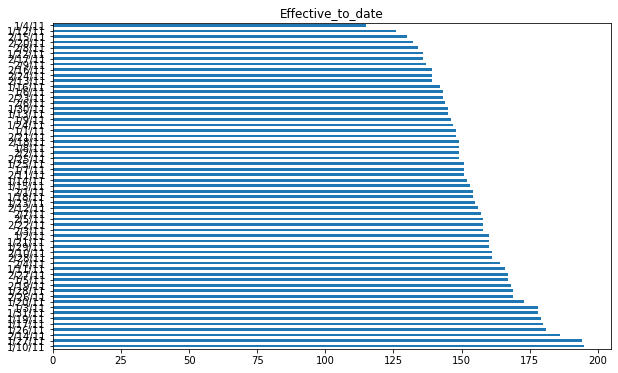

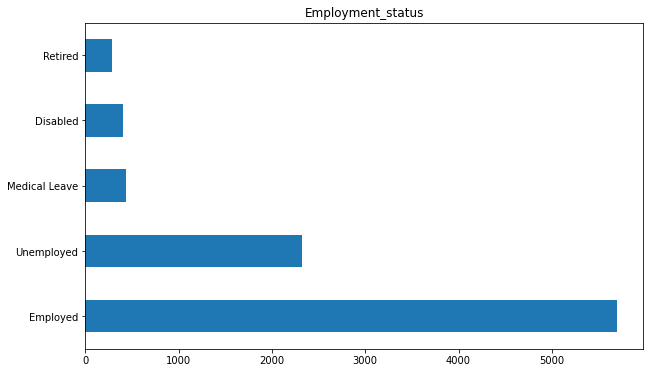

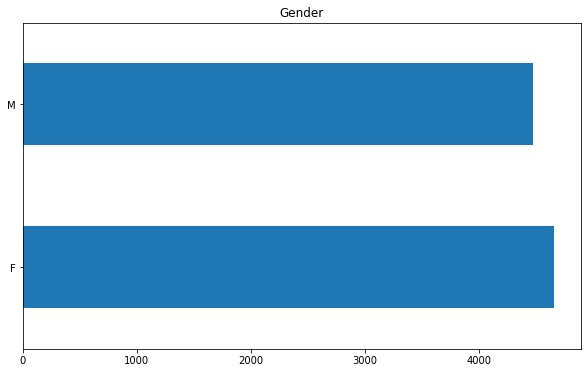

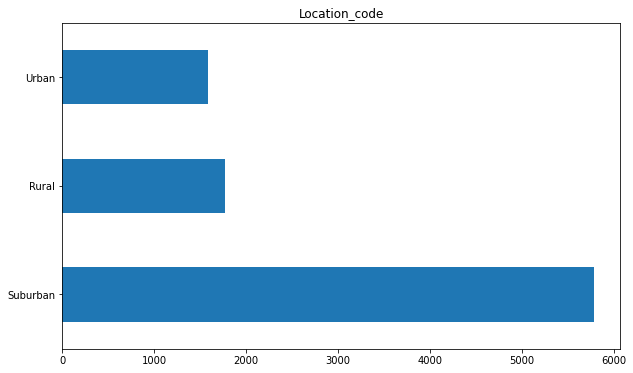

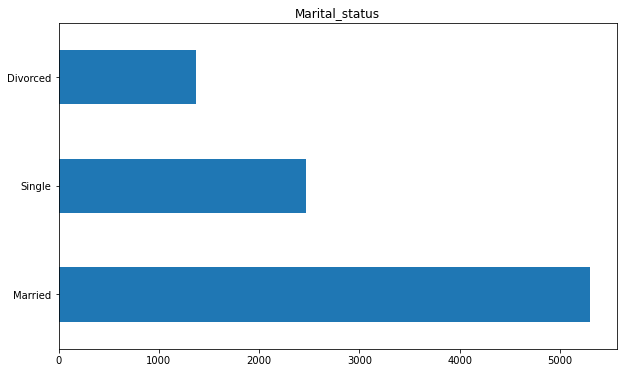

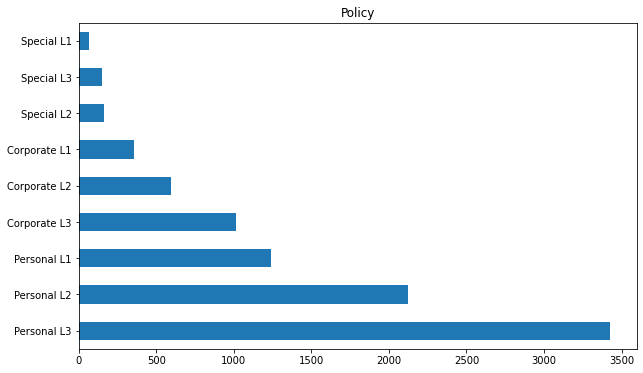

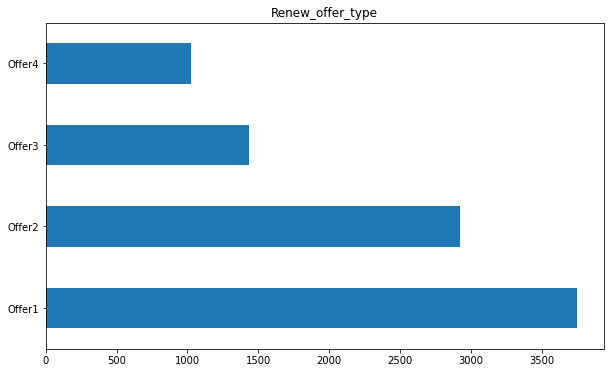

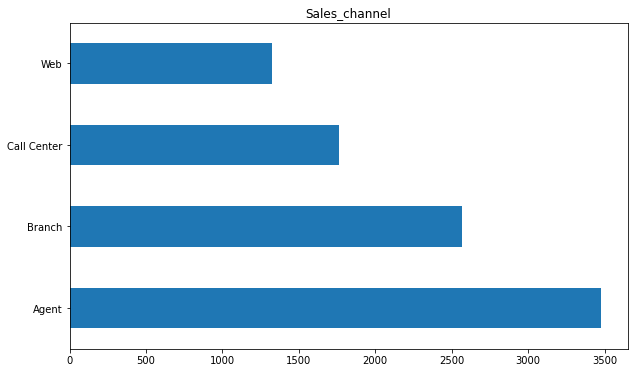

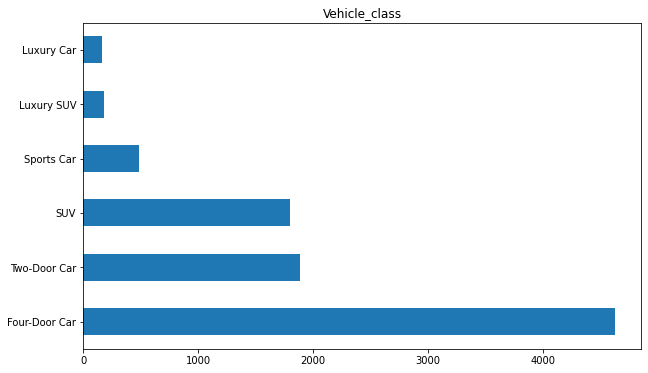

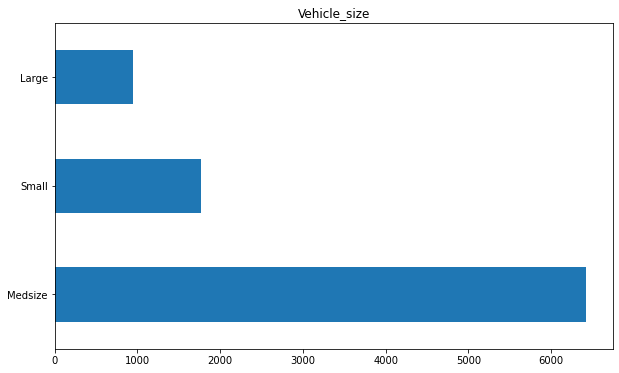

In [75]:
#построение гистограмм для категрориальных переменных

fields_list = list(data)


for i in fields_list:
    
    if data[i].dtype =='object':
        
        data_plot = data[i].value_counts()
        data_plot.plot(kind='barh', figsize=(10, 6), title=i)
        plt.show()  

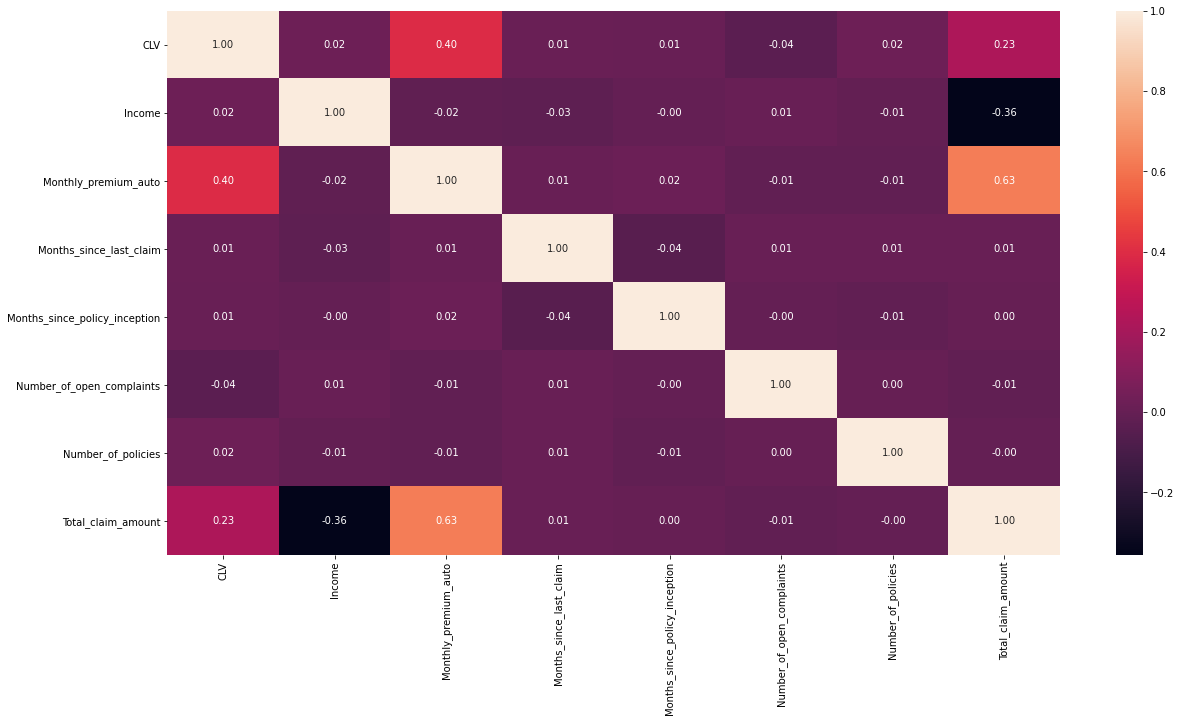

In [76]:
#построение heatmap для оценки корреляции признаков

Corr = data.corr()
plt.figure(figsize=(20,10));
sns.heatmap(Corr, annot=True, fmt='.2f');

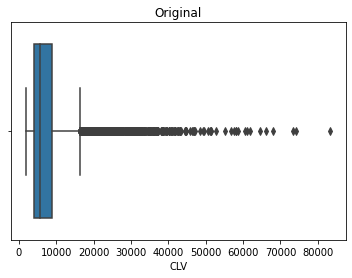

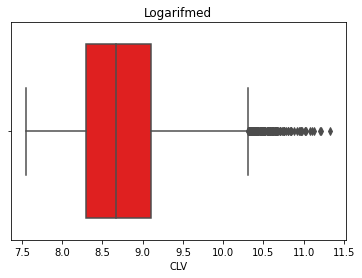

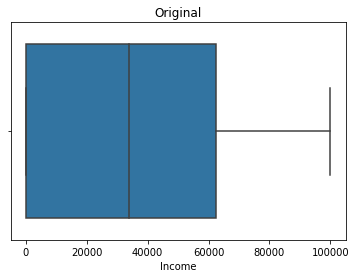

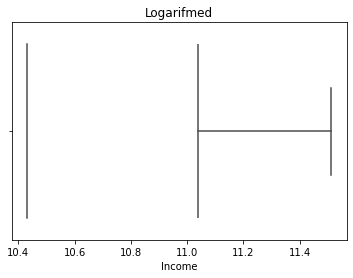

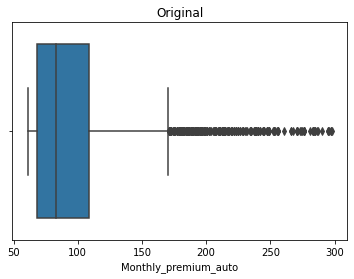

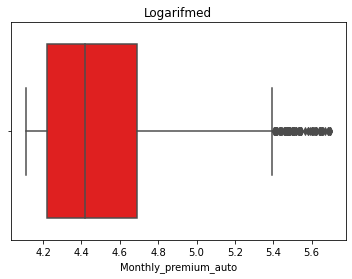

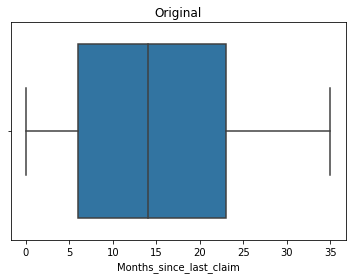

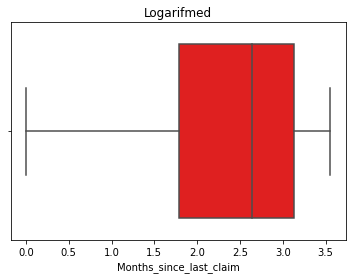

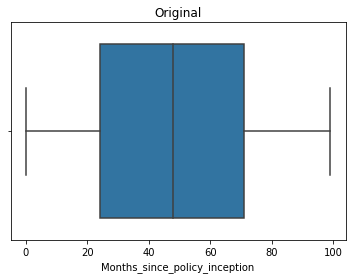

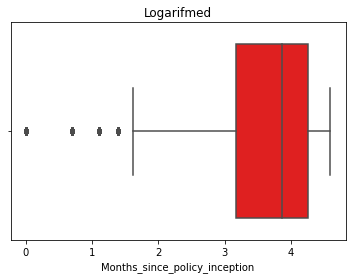

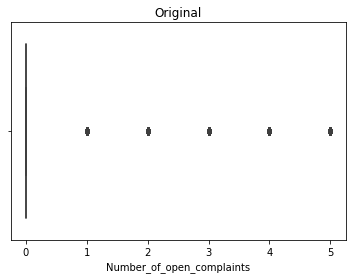

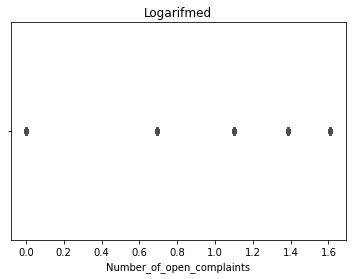

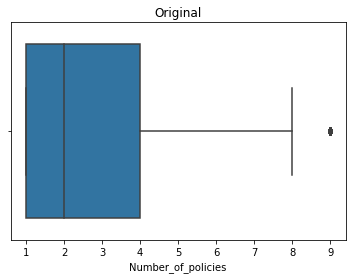

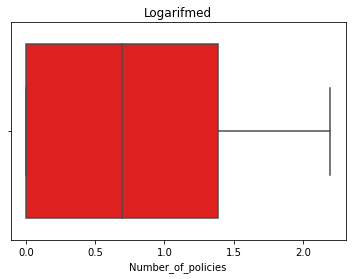

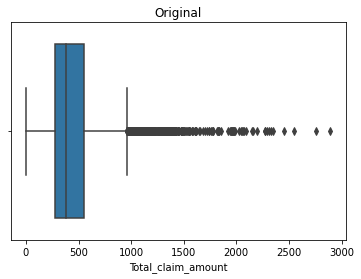

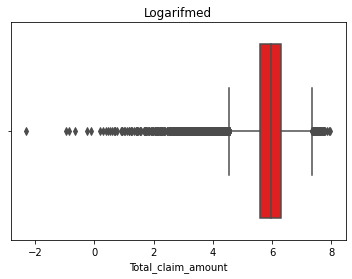

In [77]:
#построение boxplot для каждого признака для оценки распределения - исходные и логарифмированные значения

fields_list = list(data)


for i in fields_list:
    
    if data[i].dtype !='object':
        
        sns.boxplot(data=data[[i]], x = i, orient = "h").set_title("Original")
        plt.show()
        
        data_log = np.log(data[[i]])
        sns.boxplot(data = data_log, x = i, orient = "h", color = 'red').set_title("Logarifmed")
        plt.show()        

# Preprocessing & Feature Engineering

In [78]:
#новая переменная - количество дней с момента вступления в силу

def days_diff_str(str_value):

    current_date = datetime.datetime.today().date()
    date = datetime.datetime.strptime(str_value, '%m/%d/%y').date()
    days_diff = (current_date - date).days
    
    return days_diff


data['Days_from_effective'] = data.apply(lambda row: days_diff_str(row.Effective_to_date), axis = 1)
data.drop(['Effective_to_date'], axis=1, inplace=True)

In [79]:
#one-hot кодирование категориальных переменных

data = pd.get_dummies(data, columns=['Gender', 'Response', 'Coverage', 'Location_code', 'Marital_status', 'Sales_channel', 'Vehicle_size'])

In [80]:
#кодирование кодирование категориальных LabelEncoder

labelencoder = LabelEncoder()

data['State_encoded'] = labelencoder.fit_transform(data['State'])
data['Education_encoded'] = labelencoder.fit_transform(data['Education'])
data['Employment_status_encoded'] = labelencoder.fit_transform(data['Employment_status'])
data['Policy_encoded'] = labelencoder.fit_transform(data['Policy'])
data['Renew_offer_type_encoded'] = labelencoder.fit_transform(data['Renew_offer_type'])
data['Vehicle_class_encoded'] = labelencoder.fit_transform(data['Vehicle_class'])

data.drop(['State', 'Education', 'Employment_status', 'Policy', 'Renew_offer_type', 'Vehicle_class'], axis=1, inplace=True)

In [81]:
#новая переменная - наличие претензий

def boolean_encoder(value):
    
    if value == 0:
        boolean_value = 0
    else:
        boolean_value = 1
        
    return boolean_value


data['Has_open_complaints'] = data.apply(lambda row: boolean_encoder(row.Number_of_open_complaints), axis = 1)
data.drop(['Number_of_open_complaints'], axis=1, inplace=True)

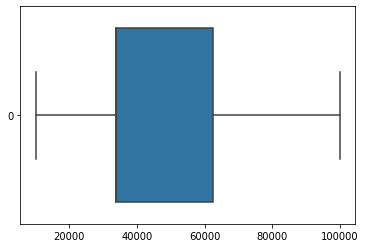

In [82]:
#Income - замена нулей

income_fill_0 = median(data['Income'])

def remove_zero(value, new_value):
    if value == 0: 
        value = new_value
    else:
        value
    return value    
        
data['Income'] = data.apply(lambda row: remove_zero(row.Income, income_fill_0), axis = 1)

sns.boxplot(data = data.Income, orient = "h")

In [83]:
#логарифмирование целевой переменной

data['CLV_log'] = np.log(data['CLV'])
data.drop(['CLV'], axis=1, inplace=True)

In [84]:
#разделение выборки на тренировочную и тестовую

y = data.CLV_log
X = data.drop('CLV_log', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
#стандартизация

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

In [86]:
#метрики качества

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       mean_squared_error(y_test, y_pred),
       mean_absolute_error(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MSE", "MAE", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MSE
MAE
MAPE


# Построение моделей с базовыми значениями гиперпараметров

In [87]:
#построение базовой модели GradientBoostingRegressor

gbr_0 = GradientBoostingRegressor()
gbr_0.fit(X_train_sc, y_train)
y_pred_gbr_0 = gbr_0.predict(X_test_sc)

measured_metrics["GradientBoosting_0"] = dataframe_metrics(y_test, y_pred_gbr_0)

In [88]:
#построение базовой модели XGBoosting

xgb_0 = XGBRegressor()
xgb_0.fit(X_train_sc, y_train)
y_pred_xgb_0 = xgb_0.predict(X_test_sc)

measured_metrics["XGBoosting_0"] = dataframe_metrics(y_test, y_pred_xgb_0)

In [89]:
#построение базовой модели CatBoost

cb_0 = CatBoostRegressor()
cb_0.fit(X_train_sc, y_train)
y_pred_cb_0 = cb_0.predict(X_test_sc)

measured_metrics["CatBoost_0"] = dataframe_metrics(y_test, y_pred_cb_0)

Learning rate set to 0.054302
0:	learn: 0.6168379	total: 12.3ms	remaining: 12.3s
1:	learn: 0.5900121	total: 20.4ms	remaining: 10.2s
2:	learn: 0.5637259	total: 29.1ms	remaining: 9.68s
3:	learn: 0.5389995	total: 36.3ms	remaining: 9.03s
4:	learn: 0.5156784	total: 41ms	remaining: 8.16s
5:	learn: 0.4936783	total: 49.3ms	remaining: 8.17s
6:	learn: 0.4730477	total: 56.2ms	remaining: 7.97s
7:	learn: 0.4534023	total: 65ms	remaining: 8.05s
8:	learn: 0.4363142	total: 86.9ms	remaining: 9.57s
9:	learn: 0.4193484	total: 97.9ms	remaining: 9.69s
10:	learn: 0.4032919	total: 106ms	remaining: 9.57s
11:	learn: 0.3883548	total: 121ms	remaining: 10s
12:	learn: 0.3744402	total: 131ms	remaining: 9.98s
13:	learn: 0.3615086	total: 145ms	remaining: 10.2s
14:	learn: 0.3495675	total: 156ms	remaining: 10.2s
15:	learn: 0.3385774	total: 169ms	remaining: 10.4s
16:	learn: 0.3284170	total: 181ms	remaining: 10.5s
17:	learn: 0.3188742	total: 195ms	remaining: 10.6s
18:	learn: 0.3102359	total: 206ms	remaining: 10.7s
19:	lea

192:	learn: 0.1838331	total: 1.18s	remaining: 4.93s
193:	learn: 0.1837675	total: 1.18s	remaining: 4.92s
194:	learn: 0.1836384	total: 1.19s	remaining: 4.9s
195:	learn: 0.1835546	total: 1.19s	remaining: 4.89s
196:	learn: 0.1834359	total: 1.2s	remaining: 4.87s
197:	learn: 0.1833159	total: 1.2s	remaining: 4.87s
198:	learn: 0.1832710	total: 1.21s	remaining: 4.87s
199:	learn: 0.1830936	total: 1.22s	remaining: 4.86s
200:	learn: 0.1829831	total: 1.22s	remaining: 4.86s
201:	learn: 0.1828802	total: 1.23s	remaining: 4.84s
202:	learn: 0.1827558	total: 1.23s	remaining: 4.84s
203:	learn: 0.1825243	total: 1.24s	remaining: 4.83s
204:	learn: 0.1824241	total: 1.24s	remaining: 4.82s
205:	learn: 0.1822900	total: 1.25s	remaining: 4.8s
206:	learn: 0.1821333	total: 1.25s	remaining: 4.79s
207:	learn: 0.1820475	total: 1.25s	remaining: 4.78s
208:	learn: 0.1819822	total: 1.26s	remaining: 4.76s
209:	learn: 0.1818547	total: 1.26s	remaining: 4.75s
210:	learn: 0.1817441	total: 1.27s	remaining: 4.74s
211:	learn: 0.18

362:	learn: 0.1674507	total: 1.95s	remaining: 3.43s
363:	learn: 0.1673625	total: 1.96s	remaining: 3.43s
364:	learn: 0.1673195	total: 1.97s	remaining: 3.42s
365:	learn: 0.1672583	total: 1.97s	remaining: 3.42s
366:	learn: 0.1671610	total: 1.98s	remaining: 3.42s
367:	learn: 0.1670953	total: 1.98s	remaining: 3.41s
368:	learn: 0.1670559	total: 1.99s	remaining: 3.4s
369:	learn: 0.1669705	total: 1.99s	remaining: 3.39s
370:	learn: 0.1669054	total: 2s	remaining: 3.38s
371:	learn: 0.1667790	total: 2s	remaining: 3.38s
372:	learn: 0.1666908	total: 2s	remaining: 3.37s
373:	learn: 0.1666540	total: 2.01s	remaining: 3.36s
374:	learn: 0.1665594	total: 2.01s	remaining: 3.36s
375:	learn: 0.1664915	total: 2.02s	remaining: 3.35s
376:	learn: 0.1664386	total: 2.02s	remaining: 3.34s
377:	learn: 0.1663852	total: 2.03s	remaining: 3.33s
378:	learn: 0.1662826	total: 2.03s	remaining: 3.33s
379:	learn: 0.1661786	total: 2.03s	remaining: 3.32s
380:	learn: 0.1661262	total: 2.04s	remaining: 3.31s
381:	learn: 0.1660275	

525:	learn: 0.1552428	total: 2.72s	remaining: 2.45s
526:	learn: 0.1551911	total: 2.73s	remaining: 2.45s
527:	learn: 0.1550506	total: 2.74s	remaining: 2.45s
528:	learn: 0.1550132	total: 2.75s	remaining: 2.44s
529:	learn: 0.1549168	total: 2.75s	remaining: 2.44s
530:	learn: 0.1548329	total: 2.76s	remaining: 2.44s
531:	learn: 0.1548014	total: 2.77s	remaining: 2.44s
532:	learn: 0.1547313	total: 2.78s	remaining: 2.44s
533:	learn: 0.1546583	total: 2.79s	remaining: 2.43s
534:	learn: 0.1546244	total: 2.79s	remaining: 2.43s
535:	learn: 0.1545773	total: 2.8s	remaining: 2.42s
536:	learn: 0.1544425	total: 2.8s	remaining: 2.42s
537:	learn: 0.1544001	total: 2.81s	remaining: 2.41s
538:	learn: 0.1543502	total: 2.81s	remaining: 2.41s
539:	learn: 0.1542399	total: 2.82s	remaining: 2.4s
540:	learn: 0.1542024	total: 2.83s	remaining: 2.4s
541:	learn: 0.1541529	total: 2.83s	remaining: 2.39s
542:	learn: 0.1540993	total: 2.84s	remaining: 2.39s
543:	learn: 0.1540375	total: 2.84s	remaining: 2.38s
544:	learn: 0.15

725:	learn: 0.1416671	total: 4.09s	remaining: 1.54s
726:	learn: 0.1415993	total: 4.1s	remaining: 1.54s
727:	learn: 0.1415329	total: 4.12s	remaining: 1.54s
728:	learn: 0.1414645	total: 4.12s	remaining: 1.53s
729:	learn: 0.1414226	total: 4.13s	remaining: 1.52s
730:	learn: 0.1413640	total: 4.13s	remaining: 1.52s
731:	learn: 0.1412684	total: 4.14s	remaining: 1.51s
732:	learn: 0.1411593	total: 4.15s	remaining: 1.51s
733:	learn: 0.1410902	total: 4.16s	remaining: 1.51s
734:	learn: 0.1410386	total: 4.17s	remaining: 1.5s
735:	learn: 0.1409507	total: 4.18s	remaining: 1.5s
736:	learn: 0.1408719	total: 4.19s	remaining: 1.5s
737:	learn: 0.1408390	total: 4.2s	remaining: 1.49s
738:	learn: 0.1407417	total: 4.21s	remaining: 1.49s
739:	learn: 0.1407076	total: 4.21s	remaining: 1.48s
740:	learn: 0.1405717	total: 4.23s	remaining: 1.48s
741:	learn: 0.1405141	total: 4.24s	remaining: 1.47s
742:	learn: 0.1403988	total: 4.25s	remaining: 1.47s
743:	learn: 0.1403192	total: 4.25s	remaining: 1.46s
744:	learn: 0.140

899:	learn: 0.1319836	total: 5.26s	remaining: 585ms
900:	learn: 0.1319437	total: 5.27s	remaining: 579ms
901:	learn: 0.1318805	total: 5.28s	remaining: 574ms
902:	learn: 0.1318190	total: 5.29s	remaining: 568ms
903:	learn: 0.1317834	total: 5.3s	remaining: 563ms
904:	learn: 0.1317374	total: 5.3s	remaining: 557ms
905:	learn: 0.1316358	total: 5.32s	remaining: 552ms
906:	learn: 0.1316053	total: 5.33s	remaining: 546ms
907:	learn: 0.1315433	total: 5.34s	remaining: 541ms
908:	learn: 0.1314903	total: 5.34s	remaining: 535ms
909:	learn: 0.1314495	total: 5.35s	remaining: 529ms
910:	learn: 0.1314250	total: 5.36s	remaining: 523ms
911:	learn: 0.1313783	total: 5.36s	remaining: 517ms
912:	learn: 0.1313466	total: 5.37s	remaining: 512ms
913:	learn: 0.1312916	total: 5.38s	remaining: 506ms
914:	learn: 0.1312468	total: 5.39s	remaining: 500ms
915:	learn: 0.1311758	total: 5.4s	remaining: 495ms
916:	learn: 0.1311453	total: 5.41s	remaining: 490ms
917:	learn: 0.1310652	total: 5.42s	remaining: 484ms
918:	learn: 0.1

In [90]:
#построение базовой модели LightGBM

lgb_0 = LGBMRegressor()
lgb_0.fit(X_train_sc, y_train)
y_pred_lgb_0 = lgb_0.predict(X_test_sc)

measured_metrics["LightGBM_0"] = dataframe_metrics(y_test, y_pred_lgb_0)
measured_metrics

,error_type,GradientBoosting_0,XGBoosting_0,CatBoost_0,LightGBM_0
0,MSE,0.043305,0.042305,0.038760,0.040907
1,MAE,0.105598,0.113787,0.101875,0.095600
2,MAPE,1.113246,1.229040,1.085442,1.008278


# Кросс-валидация и построение моделей с оптимальными значениями гиперпараметров

In [92]:
#подбор гиперпараметров для GradientBoosting

gbr_params = {
    'n_estimators': range(50, 300),
    'max_depth': range(1, 20),
    'subsample': np.arange(0.1, 1.1, 0.1)
}


gbr_rand_search = RandomizedSearchCV(gbr_0, gbr_params, cv=10, scoring='neg_mean_squared_error', random_state=40)
gbr_rand_search.fit(X_train_sc, y_train)

gbr_1 = gbr_rand_search.best_estimator_

print("Best CV score: {:.3f}, \nn_estimators: {}, \nmax_depth: {}, \nsubsample: {:.1f}"
      .format(gbr_rand_search.best_score_, 
              gbr_1.n_estimators, 
              gbr_1.max_depth, 
              gbr_1.subsample)
)

Best CV score: -0.040, 
n_estimators: 91, 
max_depth: 6, 
subsample: 0.5


In [93]:
#подбор гиперпараметров для XGBoosting

xgb_params = {
    'n_estimators': range(50, 300),
    'max_depth': range(1, 20),
    'subsample': np.arange(0.1, 1.1, 0.1)   
}


xgb_rand_search = RandomizedSearchCV(xgb_0, xgb_params, cv=10, scoring='neg_mean_squared_error', random_state=40)
xgb_rand_search.fit(X_train_sc, y_train)

xgb_1 = gbr_rand_search.best_estimator_

print("Best CV score: {:.3f}, \nn_estimators: {}, \nmax_depth: {}, \nsubsample: {:.1f}"
      .format(gbr_rand_search.best_score_, 
              xgb_1.n_estimators, 
              xgb_1.max_depth, 
              xgb_1.subsample)
)

Best CV score: -0.040, 
n_estimators: 91, 
max_depth: 6, 
subsample: 0.5


In [103]:
#подбор гиперпараметров для CatBoost

cb_params = {
    'iterations': range(1, 10),
    'max_depth': range(1, 16),
    'subsample': np.arange(0.1, 1.1, 0.1)
}


cb_rand_search = RandomizedSearchCV(cb_0, cb_params, cv=10, scoring='neg_mean_squared_error', random_state=40)
cb_rand_search.fit(X_train_sc, y_train)

cb_iterations = cb_rand_search.best_params_['iterations']
cb_max_depth = cb_rand_search.best_params_['max_depth']
cb_subsample = cb_rand_search.best_params_['subsample']

print("Best CV score: {:.3f}, \niterations: {}, \nmax_depth: {}, \nsubsample: {:.1f}" 
      .format(cb_rand_search.best_score_, 
              cb_iterations, 
              cb_max_depth, 
              cb_subsample)
)

Learning rate set to 0.5
0:	learn: 0.4050302	total: 3.07ms	remaining: 3.07ms
1:	learn: 0.2824297	total: 5.29ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4035969	total: 1.81ms	remaining: 1.81ms
1:	learn: 0.2810517	total: 4.14ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4022961	total: 2.41ms	remaining: 2.41ms
1:	learn: 0.2802754	total: 5.43ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4046140	total: 1.73ms	remaining: 1.73ms
1:	learn: 0.2819261	total: 3.58ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4064092	total: 2.14ms	remaining: 2.14ms
1:	learn: 0.2829352	total: 4.03ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4034530	total: 2.6ms	remaining: 2.6ms
1:	learn: 0.2811276	total: 5.05ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4067054	total: 1.75ms	remaining: 1.75ms
1:	learn: 0.2836189	total: 4.47ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4037782	total: 1.84ms	remaining: 1.84ms
1:	learn: 0.2809559	total: 4.06ms	remaining

5:	learn: 0.1772503	total: 661ms	remaining: 331ms
6:	learn: 0.1559170	total: 772ms	remaining: 220ms
7:	learn: 0.1384971	total: 879ms	remaining: 110ms
8:	learn: 0.1258990	total: 991ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4772738	total: 122ms	remaining: 973ms
1:	learn: 0.3303769	total: 155ms	remaining: 543ms
2:	learn: 0.2701486	total: 278ms	remaining: 557ms
3:	learn: 0.2297404	total: 394ms	remaining: 492ms
4:	learn: 0.1953489	total: 505ms	remaining: 404ms
5:	learn: 0.1718163	total: 609ms	remaining: 305ms
6:	learn: 0.1522796	total: 715ms	remaining: 204ms
7:	learn: 0.1375356	total: 828ms	remaining: 103ms
8:	learn: 0.1251101	total: 940ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4765035	total: 116ms	remaining: 924ms
1:	learn: 0.3352714	total: 145ms	remaining: 509ms
2:	learn: 0.2712598	total: 254ms	remaining: 509ms
3:	learn: 0.2338864	total: 367ms	remaining: 458ms
4:	learn: 0.2036562	total: 472ms	remaining: 377ms
5:	learn: 0.1761283	total: 576ms	remaining: 288ms
6:	l

Learning rate set to 0.5
0:	learn: 0.4020476	total: 799us	remaining: 3.2ms
1:	learn: 0.2945701	total: 1.74ms	remaining: 2.61ms
2:	learn: 0.2506099	total: 2.46ms	remaining: 1.64ms
3:	learn: 0.2307296	total: 3.18ms	remaining: 794us
4:	learn: 0.2230053	total: 4.63ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3971997	total: 749us	remaining: 3ms
1:	learn: 0.2946473	total: 1.51ms	remaining: 2.27ms
2:	learn: 0.2490879	total: 2.19ms	remaining: 1.46ms
3:	learn: 0.2286700	total: 2.83ms	remaining: 708us
4:	learn: 0.2215748	total: 3.48ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3990704	total: 741us	remaining: 2.96ms
1:	learn: 0.2953168	total: 2.92ms	remaining: 4.38ms
2:	learn: 0.2507862	total: 3.63ms	remaining: 2.42ms
3:	learn: 0.2280837	total: 4.33ms	remaining: 1.08ms
4:	learn: 0.2218185	total: 5.05ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4012787	total: 763us	remaining: 3.05ms
1:	learn: 0.2977967	total: 1.5ms	remaining: 2.25ms
2:	learn: 0.2527810	total: 3.09ms	re

In [108]:
#подбор гиперпараметров для LightGBM

lgb_params = {
    'n_estimators': range(50, 300),
    'max_depth': range(1, 20),
    'num_leaves': range(10, 100)
}


lgb_rand_search = RandomizedSearchCV(lgb_0, lgb_params, cv=10, scoring='neg_mean_squared_error', random_state=40)
lgb_rand_search.fit(X_train_sc, y_train)

lgb_1 = lgb_rand_search.best_estimator_

print("Best CV score: {:.3f}, \nn_estimators: {}, \nmax_depth: {}, \nnum_leaves: {}"
      .format(lgb_rand_search.best_score_, 
              lgb_1.n_estimators, 
              lgb_1.max_depth, 
              lgb_1.num_leaves
             )
)

Best CV score: -0.040, 
n_estimators: 69, 
max_depth: 15, 
num_leaves: 22


In [104]:
#построение модели GradientBoosting с подобранными гиперпараметрами

gbr_1.fit(X_train_sc, y_train)
y_pred_gbr_1 = gbr_1.predict(X_test_sc)

measured_metrics["GradientBoosting_1"] = dataframe_metrics(y_test, y_pred_gbr_1)

In [105]:
#построение модели XGBoosting с подобранными гиперпараметрами

xgb_1.fit(X_train_sc, y_train)
y_pred_xgb_1 = xgb_1.predict(X_test_sc)

measured_metrics["XGBoosting_1"] = dataframe_metrics(y_test, y_pred_xgb_1)

In [106]:
#построение модели CatBoost с подобранными гиперпараметрами

cb_1 = CatBoostRegressor(iterations = cb_iterations, 
                         max_depth = cb_max_depth, 
                         subsample = cb_subsample
                         )

cb_1.fit(X_train_sc, y_train)
y_pred_cb_1 = cb_1.predict(X_test_sc)

measured_metrics["CatBoost_1"] = dataframe_metrics(y_test, y_pred_cb_1)

Learning rate set to 0.5
0:	learn: 0.4193164	total: 9.6ms	remaining: 76.8ms
1:	learn: 0.2898838	total: 16.9ms	remaining: 59.3ms
2:	learn: 0.2366458	total: 24.3ms	remaining: 48.6ms
3:	learn: 0.2105300	total: 32ms	remaining: 39.9ms
4:	learn: 0.1987652	total: 38.9ms	remaining: 31.1ms
5:	learn: 0.1910063	total: 46.4ms	remaining: 23.2ms
6:	learn: 0.1866790	total: 53.3ms	remaining: 15.2ms
7:	learn: 0.1808369	total: 60.8ms	remaining: 7.59ms
8:	learn: 0.1760956	total: 67.8ms	remaining: 0us


In [109]:
#построение модели LightGBM с подобранными гиперпараметрами 

lgb_1.fit(X_train_sc, y_train)
y_pred_lgb_1 = lgb_1.predict(X_test_sc)

measured_metrics["LightGBM_1"] = dataframe_metrics(y_test, y_pred_lgb_1)
measured_metrics = measured_metrics[['error_type', 
                                     'GradientBoosting_0', 'GradientBoosting_1', 
                                     'XGBoosting_0', 'XGBoosting_1', 
                                     'CatBoost_0', 'CatBoost_1', 
                                     'LightGBM_0', 'LightGBM_1']]
measured_metrics

,error_type,GradientBoosting_0,GradientBoosting_1,XGBoosting_0,XGBoosting_1,CatBoost_0,CatBoost_1,LightGBM_0,LightGBM_1
0,MSE,0.043305,0.042508,0.042305,0.041321,0.038760,0.047180,0.040907,0.041129
1,MAE,0.105598,0.103337,0.113787,0.102070,0.101875,0.119203,0.095600,0.097957
2,MAPE,1.113246,1.096533,1.229040,1.083600,1.085442,1.275111,1.008278,1.031844
